In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

/home/yunas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
house_num = 160


In [4]:
np.random.seed(42)
house_size = np.random.randint(low=900, high=3000, size=house_num)

In [9]:
np.random.seed(42)
house_price=house_size*100 + np.random.randint(low=10000, high=50000, size=house_num)

In [11]:
%matplotlib inline

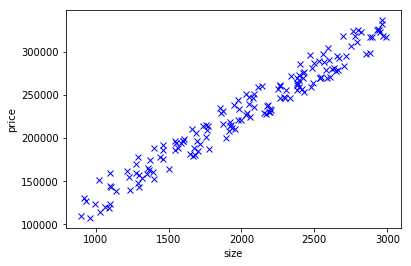

In [12]:
plt.plot(house_size, house_price, "bx")
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In [24]:
def normalize(array):
    return (array - array.mean())/array.std()
import math

In [25]:
train_samples = math.floor(house_num*.7)

In [26]:
train_house_size= np.asarray(house_size[:train_samples])
train_house_price= np.asanyarray(house_price[:train_samples:])

In [27]:
train_house_size.shape

(112,)

In [28]:
train_house_size_norm = normalize(train_house_size)
train_house_price_norm = normalize(train_house_price)

In [29]:
test_house_price = np.array(house_price[train_samples:])
test_house_size= np.array(house_size[train_samples:])

In [32]:
test_house_price_norm = normalize(test_house_price)
test_house_size_norm = normalize(test_house_size)
                                

In [33]:
tf_size = tf.placeholder("float", name="size")
tf_price = tf.placeholder("float", name="price")

In [36]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_factor = tf.Variable(np.random.randn(), name="price_factor")

In [38]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor,tf_size ), tf_price_factor)
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*train_samples)

In [39]:
learning_rate = 0.1

In [42]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [46]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    display_every = 2
    train_iter = 50
    for iteration in range(train_iter):
        for (x,y) in zip(train_house_size_norm, train_house_price_norm):
            sess.run(optimizer, feed_dict = {tf_size: x, tf_price:y})
        if (iteration+1)%display_every ==0 :
            c = sess.run(tf_cost, feed_dict= {tf_size:train_house_size_norm, tf_price:train_house_price_norm })
            print("iteration # :", '%04d' %(iteration +1), "cost" , "{:9f}".format(c), \
                 "size_factor= ", sess.run(tf_size_factor), "price_offset", sess.run(tf_price_factor))
            
    print("Optimation comppleted")
    train_cost = sess.run(tf_cost, feed_dict = {tf_size:train_house_size_norm, tf_price:train_house_price_norm })
    print("Training_cost = " , train_cost, "size_factor= ", sess.run(tf_size_factor), "price_offset", sess.run(tf_price_factor ))

iteration # : 0002 cost  1.291951 size_factor=  0.1627548 price_offset -1.3698007
iteration # : 0004 cost  0.872067 size_factor=  0.3111412 price_offset -1.1211833
iteration # : 0006 cost  0.590761 size_factor=  0.43258527 price_offset -0.9176628
iteration # : 0008 cost  0.402300 size_factor=  0.5319789 price_offset -0.7510581
iteration # : 0010 cost  0.276046 size_factor=  0.6133264 price_offset -0.61467326
iteration # : 0012 cost  0.191468 size_factor=  0.6799034 price_offset -0.503026
iteration # : 0014 cost  0.134812 size_factor=  0.7343918 price_offset -0.41163036
iteration # : 0016 cost  0.096863 size_factor=  0.7789872 price_offset -0.33681235
iteration # : 0018 cost  0.071446 size_factor=  0.81548584 price_offset -0.27556512
iteration # : 0020 cost  0.054423 size_factor=  0.84535766 price_offset -0.22542742
iteration # : 0022 cost  0.043025 size_factor=  0.8698046 price_offset -0.18438406
iteration # : 0024 cost  0.035393 size_factor=  0.88981336 price_offset -0.15078542
iterat